In [ ]:
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/content/drive/MyDrive/Triage1 (AI project)/Triage1.xlsx' # Update with your file path
data = pd.read_excel(file_path)

In [ ]:
print(data.head()) # Display the first few rows of the dataset

   AGE  SEX CHIEF COMPLAINT CORMORBITIDES    RR  SPO2  HR  SBP  DBP  TEMP  \
0   64    1         SYNCOPE      MULTIPLE  18.0    96  44  156   90  99.9   
1   52    1         SYNCOPE      MULTIPLE  20.0    99  38  148   80  98.0   
2   55    1         SYNCOPE        SINGLE  22.0    99  42  164   70  97.9   
3   36    0         SYNCOPE        SINGLE  18.0    98  50  148   68  97.3   
4   72    0         SYNCOPE      MULTIPLE  18.0    98  48  150   70  98.3   

   GCS  ATP RED  
0   15        1  
1   15        1  
2   15        1  
3   15        1  
4   15        1  


In [ ]:
print(data.isnull().sum()) # Sum of missing values in each column

AGE                0
SEX                0
CHIEF COMPLAINT    0
CORMORBITIDES      0
RR                 0
SPO2               0
HR                 0
SBP                0
DBP                0
TEMP               0
GCS                0
ATP RED            0
dtype: int64


In [ ]:
print(data.dtypes)

AGE                  int64
SEX                  int64
CHIEF COMPLAINT     object
CORMORBITIDES       object
RR                 float64
SPO2                 int64
HR                   int64
SBP                  int64
DBP                  int64
TEMP               float64
GCS                  int64
ATP RED              int64
dtype: object


In [ ]:
data['RR'] = data['RR'].astype(int)

Managing categorical variables


In [ ]:
# Remove trailing spaces from 'CHIEF COMPLAINT' column
data['CHIEF COMPLAINT'] = data['CHIEF COMPLAINT'].str.strip()

In [ ]:
# Remove trailing spaces from 'COMORBIDITIES' column
data['CORMORBITIDES'] = data['CORMORBITIDES'].str.strip()

In [ ]:
data.replace('SINGLE ', 'SINGLE', inplace=True)
data.replace('FEVER ', 'FEVER', inplace=True)
data.replace('HEMATURIA ', 'HEMATURIA', inplace=True)
data.replace('ROAD TRAFFIC ACCIDENT ', 'ROAD TRAFFIC ACCIDENT', inplace=True)
data.replace('UNABLE TO PASS URIN', 'UNABLE TO PASS URINE', inplace=True)
data.replace('CHEST PAIN ', 'CHEST PAIN', inplace=True)
data.replace('HEADACHE ', 'HEADACHE', inplace=True)

In [ ]:
import pandas as pd

In [ ]:
# Assuming 'data' is your DataFrame
# One-hot encode the 'CHIEF COMPLAINT' column
encoded_data = pd.get_dummies(data['CHIEF COMPLAINT'])

In [ ]:
# Join the encoded DataFrame with the original DataFrame
data = data.join(encoded_data)

In [ ]:
# Drop the original 'CHIEF COMPLAINT' column
data.drop('CHIEF COMPLAINT', axis=1, inplace=True)

In [ ]:
print(data.columns)

Index(['AGE', 'SEX', 'CORMORBITIDES', 'RR', 'SPO2', 'HR', 'SBP', 'DBP', 'TEMP',
       'GCS', 'ATP RED', 'ALTERED MENTAL STATUS', 'ANIMAL BITE', 'APHASIA',
       'CHEST PAIN', 'EARACHE', 'FALL FROM HEIGHT', 'FEVER',
       'FOREIGN BODY IN EAR', 'FOREIGN BODY IN EYE', 'GENERALIZED WEAKNESS',
       'GUM BLEEDING', 'HEADACHE', 'HEMATEMESIS', 'HEMATURIA', 'HEMOPTYSIS',
       'LIMB WEAKNESS', 'LOOSE MOTION', 'MELENA', 'NASAL BLEEDING',
       'PAIN ABDOMEN', 'PAINFULL RED EYE', 'PALPITATION', 'PER RECTAL BLEED',
       'PER VAGINAL BLEEDING', 'POISONING', 'ROAD TRAFFIC ACCIDENT',
       'SEIZURES', 'SOB', 'SUDDEN LOSS OF VISION', 'SYNCOPE', 'UNABLE TO EAT',
       'UNABLE TO PASS URINE', 'VERTIGO', 'VOMITING'],
      dtype='object')


In [ ]:
# One-hot encode the 'CORMORBITIDES' column
encoded_data = pd.get_dummies(data['CORMORBITIDES'])

In [ ]:
# Join the encoded DataFrame with the original DataFrame
data = data.join(encoded_data)

In [ ]:
# Drop the original 'CORMORBITIDES' column
data.drop('CORMORBITIDES', axis=1, inplace=True)

In [ ]:
print(data.columns)

Index(['AGE', 'SEX', 'RR', 'SPO2', 'HR', 'SBP', 'DBP', 'TEMP', 'GCS',
       'ATP RED', 'ALTERED MENTAL STATUS', 'ANIMAL BITE', 'APHASIA',
       'CHEST PAIN', 'EARACHE', 'FALL FROM HEIGHT', 'FEVER',
       'FOREIGN BODY IN EAR', 'FOREIGN BODY IN EYE', 'GENERALIZED WEAKNESS',
       'GUM BLEEDING', 'HEADACHE', 'HEMATEMESIS', 'HEMATURIA', 'HEMOPTYSIS',
       'LIMB WEAKNESS', 'LOOSE MOTION', 'MELENA', 'NASAL BLEEDING',
       'PAIN ABDOMEN', 'PAINFULL RED EYE', 'PALPITATION', 'PER RECTAL BLEED',
       'PER VAGINAL BLEEDING', 'POISONING', 'ROAD TRAFFIC ACCIDENT',
       'SEIZURES', 'SOB', 'SUDDEN LOSS OF VISION', 'SYNCOPE', 'UNABLE TO EAT',
       'UNABLE TO PASS URINE', 'VERTIGO', 'VOMITING', 'MULTIPLE', 'NONE',
       'SINGLE'],
      dtype='object')


In [ ]:
import pandas as pd

In [ ]:
# Assuming 'data' is your DataFrame
selected_columns = ['AGE', 'RR', 'SPO2', 'HR', 'SBP', 'DBP', 'TEMP', 'GCS']
Q1 = data[selected_columns].quantile(0.25)
Q3 = data[selected_columns].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Identifying outliers
outliers = ((data[selected_columns] < (Q1 - 1.5 * IQR)) | (data[selected_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_df = data[selected_columns][outliers]
print("Outliers detected:\n", outliers_df)

Outliers detected:
       AGE  RR  SPO2   HR  SBP  DBP   TEMP  GCS
9      60  14    96   38  150   74   97.0   15
13     59  14    98   48  139   70  101.0   15
26     71  14    97   50  134   70   96.8   15
33     76  22    86  110   97   35   96.0   15
34     35  24    84   98  103   74   97.5   15
...   ...  ..   ...  ...  ...  ...    ...  ...
1232   17  18   100   72  180   68   97.4   11
1233   18  18   100   70  198  147   98.2   11
1234   24  20   100   78  139   77   99.3   11
1235   84  19   100   70  187   60   98.6   11
1236   62  20   100   72  180   68   97.4   11

[503 rows x 8 columns]


In [ ]:
pd.set_option('display.max_rows', None)
print("Outliers detected:\n", outliers_df)

Outliers detected:
       AGE  RR  SPO2   HR  SBP  DBP   TEMP  GCS
9      60  14    96   38  150   74   97.0   15
13     59  14    98   48  139   70  101.0   15
26     71  14    97   50  134   70   96.8   15
33     76  22    86  110   97   35   96.0   15
34     35  24    84   98  103   74   97.5   15
35     62  28    82   91  145   95   98.1   15
36     38  22    88   68  141  102   97.0   15
37     66  26    84   78  162   94   97.9   15
38     72  30    78   88  132   91   98.3   15
39     56  32    88   94  139   93   97.8   15
40     74  26    81   82  164   93  101.0   15
41     66  24    85   87  167   89   97.0   15
42     30  22    82   83  105   65   97.5   15
43     55  28    77   88  146   72   97.9   15
44     46  34    89   94  134   70   97.8   15
46     51  24    76   86  127   55   97.8   15
47     44  26    80   78  109   75   97.4   15
48     46  36    90  112  186   92   96.8   15
49     49  22    88   88  126   86   97.5   15
50     51  24    85   86  110   71   97.

Splitting --> Normalisation --> handling imbalance data (SMOTE)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# Define features and target
X = data.drop('ATP RED', axis=1) # Features
y = data['ATP RED'] # Target variable named 'ATP RED'

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Fit the scaler on the training data and transform (normalize) the training data
X_train_normalized = scaler.fit_transform(X_train)

In [ ]:
# Transform (normalize) the testing data using the same scaler
X_test_normalized = scaler.transform(X_test)

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

In [ ]:
# Apply SMOTE to the normalized training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train_normalized, y_train)

In [ ]:
# Create DataFrame for the training data
train_data_smote = pd.concat([pd.DataFrame(X_train_smote, columns=X_train.columns), pd.DataFrame(y_train_smote, columns=['ATP RED'])], axis=1)

# Create DataFrame for the testing data
test_data_normalized = pd.concat([pd.DataFrame(X_test_normalized, columns=X_test.columns), y_test.reset_index(drop=True)], axis=1)

In [ ]:
# Define the file paths in your Google Drive
train_file_path = '/content/drive/MyDrive/Triage1 (AI project)/train_data_smote.csv'
test_file_path = '/content/drive/MyDrive/Triage1 (AI project)/test_data_normalized.csv'

In [ ]:
# Save the preprocessed training data
train_data_smote.to_csv(train_file_path, index=False)

In [ ]:
# Save the preprocessed testing data
test_data_normalized.to_csv(test_file_path, index=False)

Logistic regression


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
log_reg = LogisticRegression(solver='saga', max_iter=1000)
log_reg.fit(X_train_normalized, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [ ]:
# Predictions on the test set
y_pred = log_reg.predict(X_test_normalized)
y_pred_proba = log_reg.predict_proba(X_test_normalized)[:, 1] # Probabilities for ROC-AUC

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [ ]:
# Output the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Cross-validation
cv_scores = cross_val_score(log_reg, X_train_normalized, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Accuracy: 0.8346774193548387
Precision: 0.8672566371681416
Recall: 0.7903225806451613
F1 Score: 0.8270042194092826
ROC-AUC Score: 0.9181841831425599

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       124
           1       0.87      0.79      0.83       124

    accuracy                           0.83       248
   macro avg       0.84      0.83      0.83       248
weighted avg       0.84      0.83      0.83       248

Cross-validation Scores: [0.82323232 0.86363636 0.7979798  0.84343434 0.82741117]
Mean CV Score: 0.8311387991591037


In [ ]:
!pip install joblib

In [ ]:
import joblib
# Save the model as a .joblib file
joblib_file = "log_reg_model.joblib"
joblib.dump(log_reg, joblib_file)

['log_reg_model.joblib']

In [ ]:
import joblib
# Specify the path in your Google Drive
joblib_file = "/content/drive/MyDrive/Triage1 (AI project)/log_reg_model.joblib" # Change to your desired path
# Save the model as a .joblib file in Google Drive
joblib.dump(log_reg, joblib_file)

['/content/drive/MyDrive/Triage1 (AI project)/log_reg_model.joblib']

Decision tree classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

In [ ]:
# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
# Evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [ ]:
# Output the metrics for Decision Tree
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1 Score:", f1_dt)

Decision Tree Accuracy: 0.8225806451612904
Decision Tree Precision: 0.8389830508474576
Decision Tree Recall: 0.7983870967741935
Decision Tree F1 Score: 0.8181818181818181


In [ ]:
# Predict probabilities for the test set
y_pred_proba_dt = dt_classifier.predict_proba(X_test)[:, 1] # Probability of the positive class

In [ ]:
# Calculate AUROC
auroc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print("AUROC for Decision Tree:", auroc_dt)

AUROC for Decision Tree: 0.8225806451612903


Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

In [ ]:
# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
y_pred_proba_rf = rf_classifier.predict_proba(X_test)[:, 1] # Probability of the positive class

In [ ]:
# Calculate AUROC
auroc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("AUROC for Random Forest:", auroc_rf)

AUROC for Random Forest: 0.9321019771071801


In [ ]:
# Evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [ ]:
# Output the metrics for Random Forest
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

Random Forest Accuracy: 0.8629032258064516
Random Forest Precision: 0.8461538461538461
Random Forest Recall: 0.8870967741935484
Random Forest F1 Score: 0.8661417322834646


In [ ]:
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
# Choose an index for the tree you want to visualize (e.g., 0 for the first tree)
tree_index = 0

In [ ]:
# Extract the selected tree from the ensemble
selected_tree = rf_classifier[tree_index]

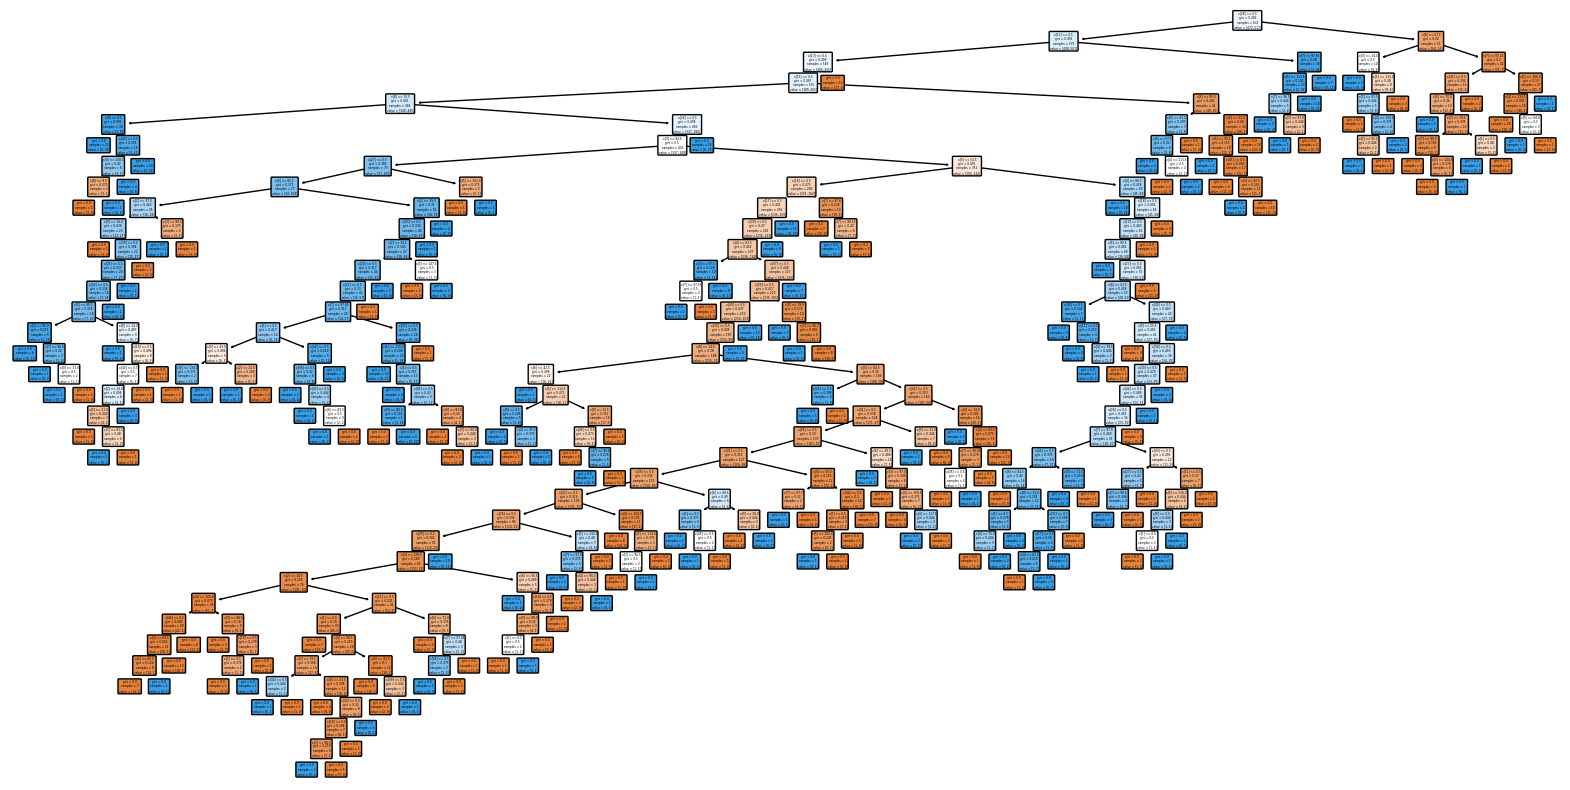

In [ ]:
# Create a high-resolution PNG file for the tree visualization
plt.figure(figsize=(20, 10)) # Adjust the figure size as needed for higher resolution
plot_tree(selected_tree, filled=True, feature_names=None, class_names=None, rounded=True)
plt.savefig('tree_visualization.png', dpi=1200, bbox_inches='tight') # Export as PNG with 300 DPI
plt.show()

In [ ]:
import joblib
# Replace 'your_model' with the name of your Random Forest model variable
# For example, if your model variable is 'rf_model', use rf_model instead.
model = rf_classifier

In [ ]:
# Specify the path where you want to save the model in Google Drive
# Replace 'path_to_save_model' with the desired path and filename in Google Drive
path_to_save_model = '/content/drive/MyDrive/Triage1 (AI project)/your_model.joblib'

In [ ]:
# Save the model to Google Drive
joblib.dump(model, path_to_save_model)

['/content/drive/MyDrive/Triage1 (AI project)/your_model.joblib']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Hyperparameter tuning in RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Define your parameter grid
param_grid = {
'n_estimators': [50, 100, 200], # Number of trees in the forest
'max_depth': [None, 10, 20, 30], # Maximum depth of the tree
'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
# You can add more parameters here
}

In [ ]:
# Initialize the classifier
rf = RandomForestClassifier()

In [ ]:
# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
# Find the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
# Train the model with the best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5)

In [ ]:
# Make predictions on the test set
y_pred = best_rf.predict(X_test)

In [ ]:
# Calculate Accuracy and Other Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred) # Note: ROC-AUC requires binary classification

In [ ]:
# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUROC:", auroc)
# Now, best_rf is your tuned model with performance metrics calculated

Accuracy: 0.8588709677419355
Precision: 0.8345864661654135
Recall: 0.8951612903225806
F1 Score: 0.8638132295719845
AUROC: 0.8588709677419354


XGBoost


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

In [ ]:
# Train the model
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

In [ ]:
# Predicted probabilities for AUROC
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auroc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)


In [ ]:
# Output the metrics
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Precision:", precision_xgb)
print("XGBoost Recall:", recall_xgb)
print("XGBoost F1 Score:", f1_xgb)
print("XGBoost AUROC:", auroc_xgb)

XGBoost Accuracy: 0.842741935483871
XGBoost Precision: 0.8512396694214877
XGBoost Recall: 0.8306451612903226
XGBoost F1 Score: 0.8408163265306123
XGBoost AUROC: 0.9064125910509886


Gradient Boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Assuming you have already split your data into X_train, X_test, y_train, y_test
# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

In [ ]:
# Train the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Predictions on the test set
y_pred_gbc = gbc.predict(X_test)

In [ ]:
# Predicted probabilities for AUROC
y_pred_proba_gbc = gbc.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)
auroc_gbc = roc_auc_score(y_test, y_pred_proba_gbc)

In [ ]:
# Output the metrics
print("Gradient Boosting Classifier Accuracy:", accuracy_gbc)
print("Gradient Boosting Classifier Precision:", precision_gbc)
print("Gradient Boosting Classifier Recall:", recall_gbc)
print("Gradient Boosting Classifier F1 Score:", f1_gbc)
print("Gradient Boosting Classifier AUROC:", auroc_gbc)

Gradient Boosting Classifier Accuracy: 0.8508064516129032
Gradient Boosting Classifier Precision: 0.859504132231405
Gradient Boosting Classifier Recall: 0.8387096774193549
Gradient Boosting Classifier F1 Score: 0.8489795918367348
Gradient Boosting Classifier AUROC: 0.9108025494276795


Hyperparameter tuning for GBC

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Initialize the classifier
gbc = GradientBoostingClassifier()

In [ ]:
# Initialize Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [ ]:
# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
# Find the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Train the model with the best parameters
best_gbc = grid_search.best_estimator_
best_gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, min_samples_split=5,
                           n_estimators=200)

In [ ]:
# Make predictions on the test set
y_pred = best_gbc.predict(X_test)

In [ ]:
# Calculate Accuracy and Other Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred) # Note: ROC-AUC requires binary classification

In [ ]:
# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUROC:", auroc)
# Now, best_gbc is your tuned model with performance metrics calculated

Accuracy: 0.8508064516129032
Precision: 0.859504132231405
Recall: 0.8387096774193549
F1 Score: 0.8489795918367348
AUROC: 0.8508064516129032


In [ ]:
import joblib

In [ ]:
# Replace 'your_model' with the name of your Random Forest model variable
# For example, if your model variable is 'rf_model', use rf_model instead.
model = best_gbc

In [ ]:
# Specify the path where you want to save the model in Google Drive
# Replace 'path_to_save_model' with the desired path and filename in Google Drive
path_to_save_model = '/content/drive/MyDrive/Triage1 (AI project)/best_gbc.joblib'

In [ ]:
# Print a message to confirm that the model is saved
print(f"Model saved as {path_to_save_model}")

Model saved as /content/drive/MyDrive/Triage1 (AI project)/best_gbc.joblib


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Initialize Support Vector Classifier
svc = SVC(probability=True) # Enable probability estimates

In [ ]:
# Calibrate the model to provide better probability estimates
calibrated_svc = CalibratedClassifierCV(svc)

In [ ]:
# Train the model
calibrated_svc.fit(X_train, y_train)

CalibratedClassifierCV(estimator=SVC(probability=True))

In [ ]:
# Predictions on the test set
y_pred_svc = calibrated_svc.predict(X_test)

In [ ]:
# Predicted probabilities for AUROC
y_pred_proba_svc = calibrated_svc.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
auroc_svc = roc_auc_score(y_test, y_pred_proba_svc)

In [ ]:
# Output the metrics
print("SVM Accuracy:", accuracy_svc)
print("SVM Precision:", precision_svc)
print("SVM Recall:", recall_svc)
print("SVM F1 Score:", f1_svc)
print("SVM AUROC:", auroc_svc)

SVM Accuracy: 0.657258064516129
SVM Precision: 0.672566371681416
SVM Recall: 0.6129032258064516
SVM F1 Score: 0.6413502109704642
SVM AUROC: 0.7135145681581686


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# Assuming you have already split your data into X_train, X_test, y_train, y_test
# Initialize K-Nearest Neighbors Classifier
# You can adjust the number of neighbors (n_neighbors) based on your dataset
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predictions on the test set
y_pred_knn = knn.predict(X_test)

In [ ]:
# Predicted probabilities for AUROC
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluation Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auroc_knn = roc_auc_score(y_test, y_pred_proba_knn)

In [ ]:
# Output the metrics
print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1 Score:", f1_knn)
print("KNN AUROC:", auroc_knn)

KNN Accuracy: 0.6290322580645161
KNN Precision: 0.6454545454545455
KNN Recall: 0.5725806451612904
KNN F1 Score: 0.6068376068376068
KNN AUROC: 0.678622528616025


Neural Network (Feeed-forward, a type of Multilayer Perceptron (MLP))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Assuming you have preprocessed data: X_train, X_test, y_train, y_test
# Build the model
model = Sequential([
Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
Dense(64, activation='relu'),
Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
31/31 [==============================] - 1s 2ms/step - loss: 1.0025 - accuracy: 0.5511
Epoch 2/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5822 - accuracy: 0.6886
Epoch 3/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.7048
Epoch 4/10
31/31 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.6593
Epoch 5/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5556 - accuracy: 0.7078
Epoch 6/10
31/31 [==============================] - 0s 1ms/step - loss: 0.5692 - accuracy: 0.6825
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7634
Epoch 8/10
31/31 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7816
Epoch 9/10
31/31 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.7917
Epoch 10/10
31/31 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7765


In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32") # Convert probabilities to class labels

8/8 [==============================] - 0s 1ms/step


In [ ]:
# Calculate Metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

In [ ]:
# Output the metrics
print("MPL Accuracy:", accuracy)
print("MPL precision:", precision)
print("MPL Recall:", recall)
print("MPL F1 Score:", f1)

MPL Accuracy: 0.7217741935483871
MPL precision: 0.8571428571428571
MPL Recall: 0.532258064516129
MPL F1 Score: 0.6567164179104477


Ensembled model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define base models
base_models = [
('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
('gbc', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

In [ ]:
#Initialize the meta-model (classifier)
meta_model = LogisticRegression()

In [ ]:
# Create the stacking ensemble model
from sklearn.ensemble import StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

In [ ]:
# Train the stacking model on the training data
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gbc',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# Make predictions on the test data
y_pred = stacking_model.predict(X_test)

In [ ]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Stacking Model Accuracy:", accuracy)

Stacking Model Accuracy: 0.8588709677419355
